# The Famous Lighthouse Problem (2D)

Described initially by Steve Gull and supposedly given to undergraduates at Cambridge (he told me that was a white lie!), this excellent bayesian inference problem tries to find a lighthouse off the shore of a coast. 

A likelihood is defined, and then simply sampled to find the maximum negative log likelihood. This shows how remarkably easy bayesian inference is. Deriving a likelihood is the difficult part.

8.92594437918


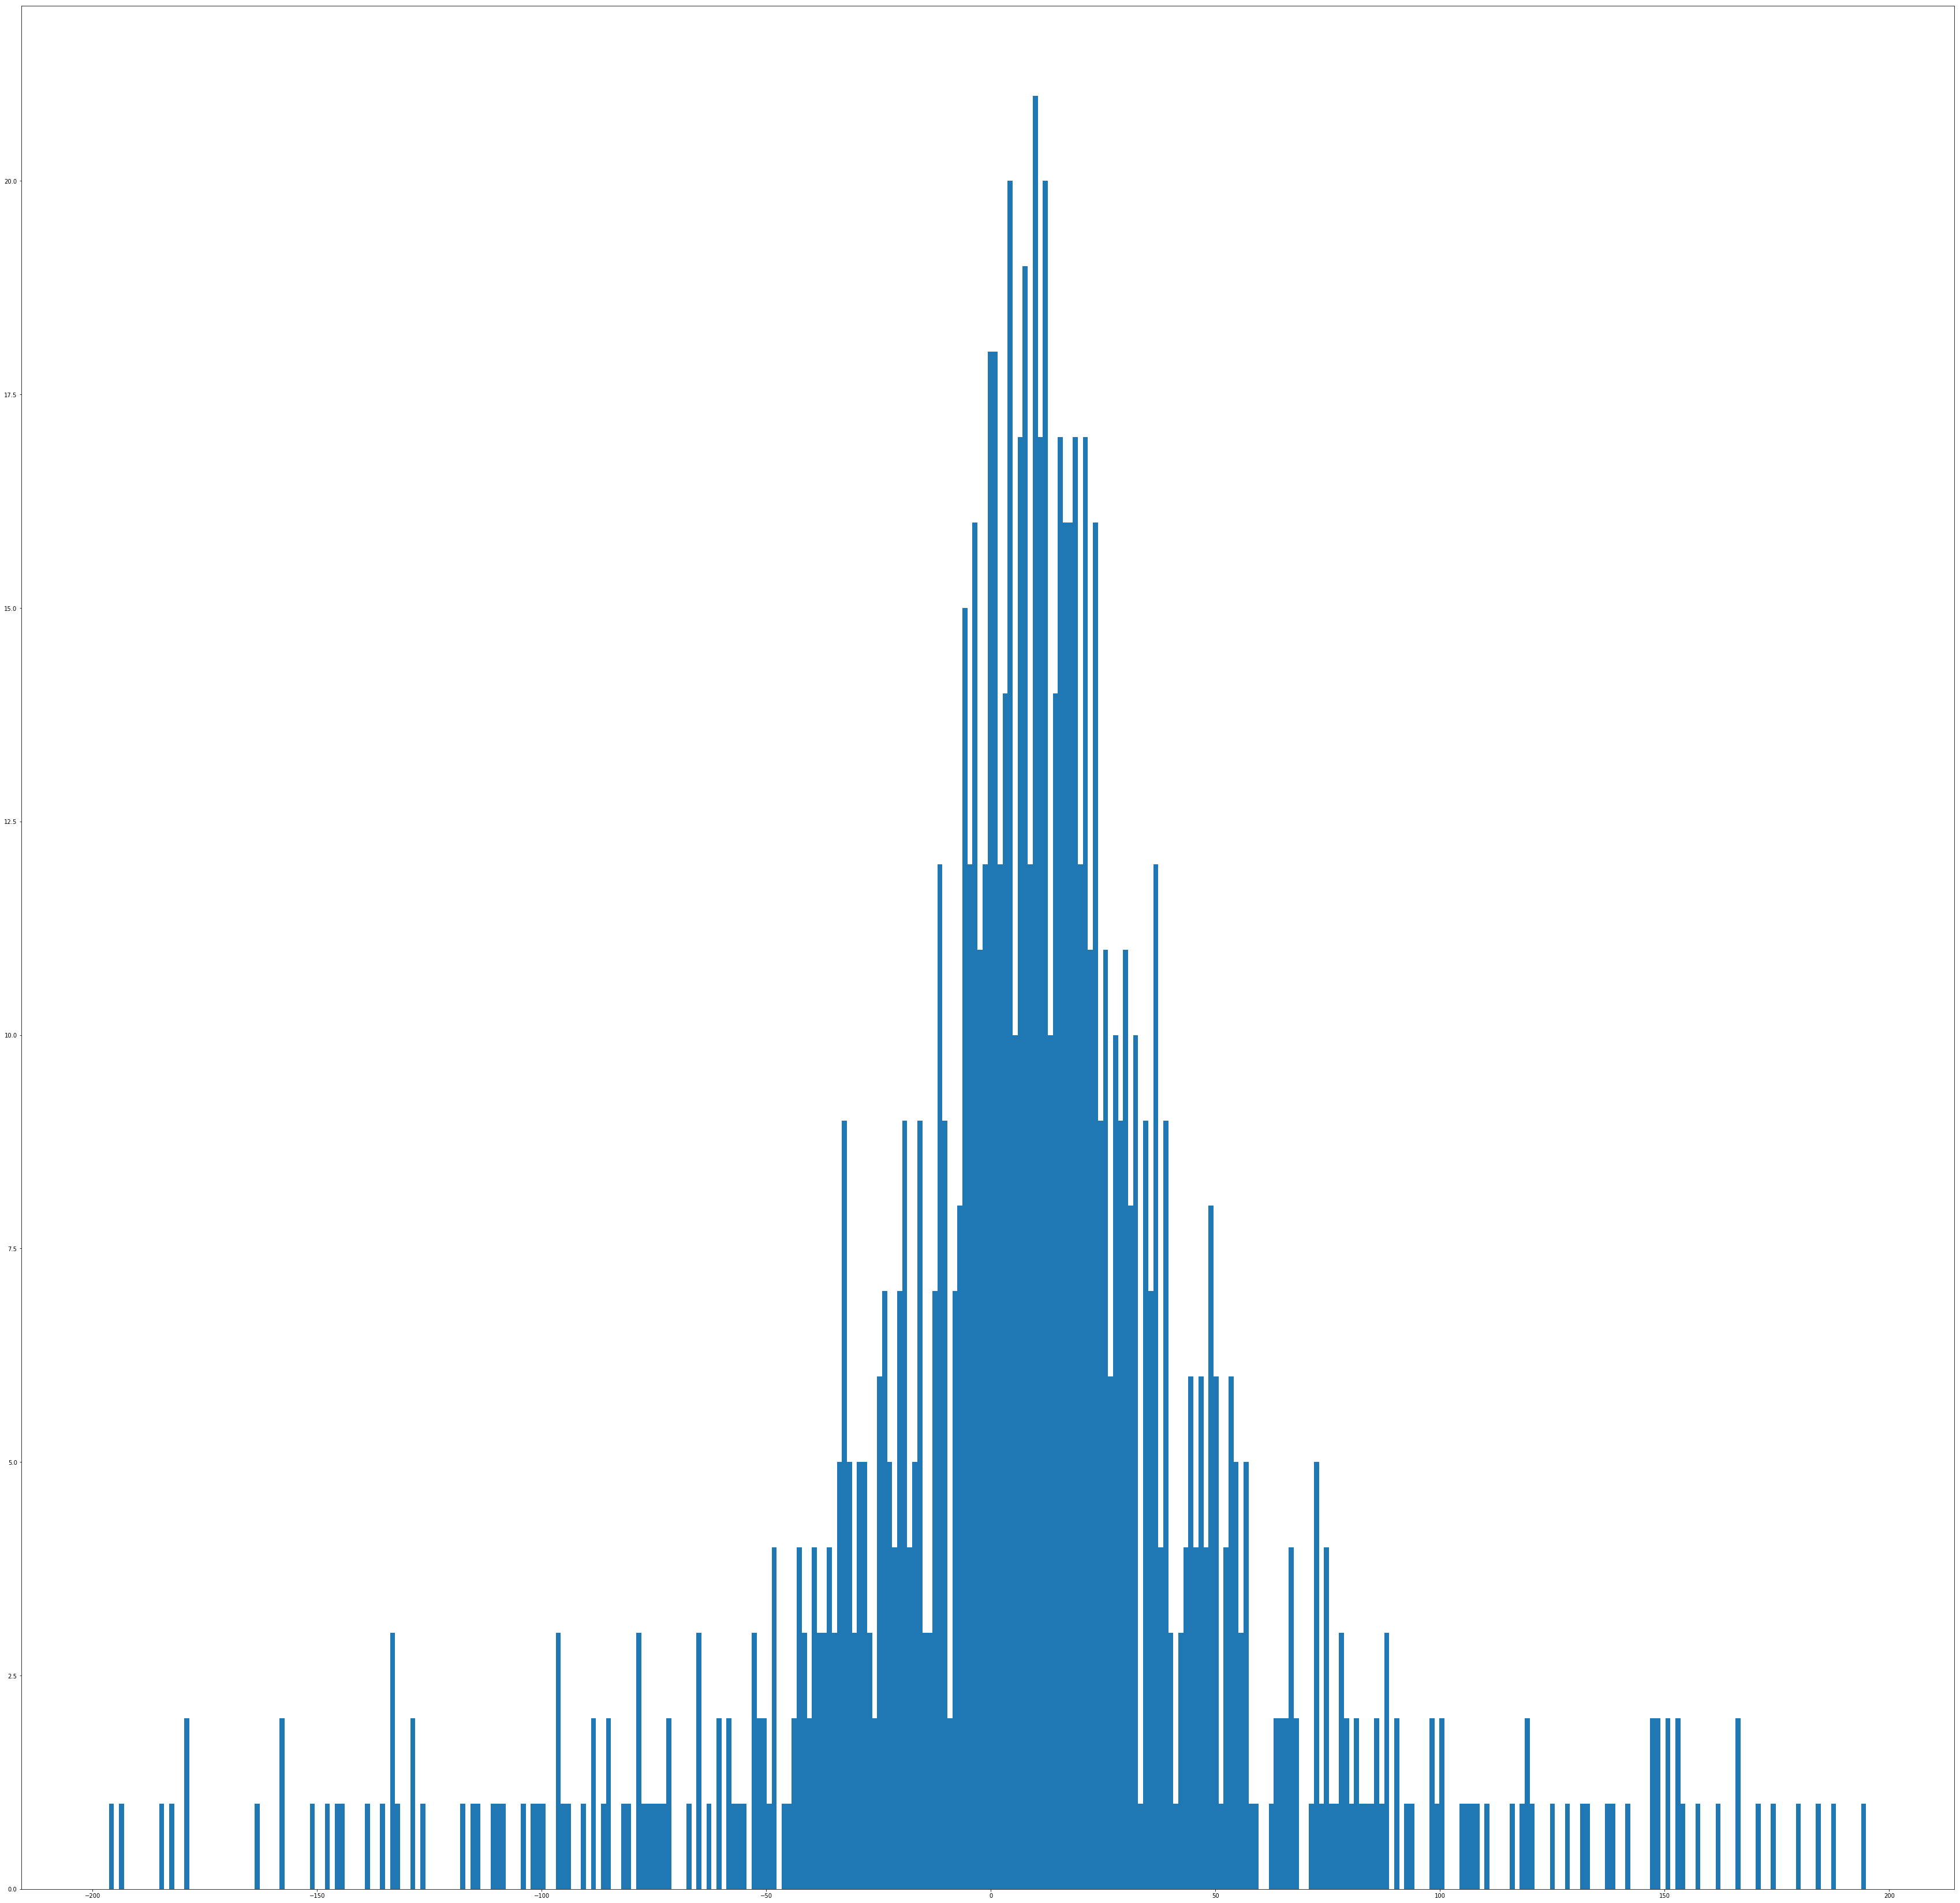

In [24]:
## Sivia Chapter 3!

import numpy
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

lighthouse_position_b = 20 #We know the distance from the coast.
lighthouse_position_a = 10 #True position along coast (what we will infer)

## Draw samples from a cauchy distribution
s =lighthouse_position_a + lighthouse_position_b*numpy.random.standard_cauchy(1000)
s = s[(s>-200) & (s<200)]
print(s.mean())
plt.hist(s, bins=350)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


-3719.56284451


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/mpl_toolkits/mplot3d/axes3d.py:1741: RuntimeWarning: invalid value encountered in true_divide
  for n in normals])
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/mpl_toolkits/mplot3d/proj3d.py:160: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


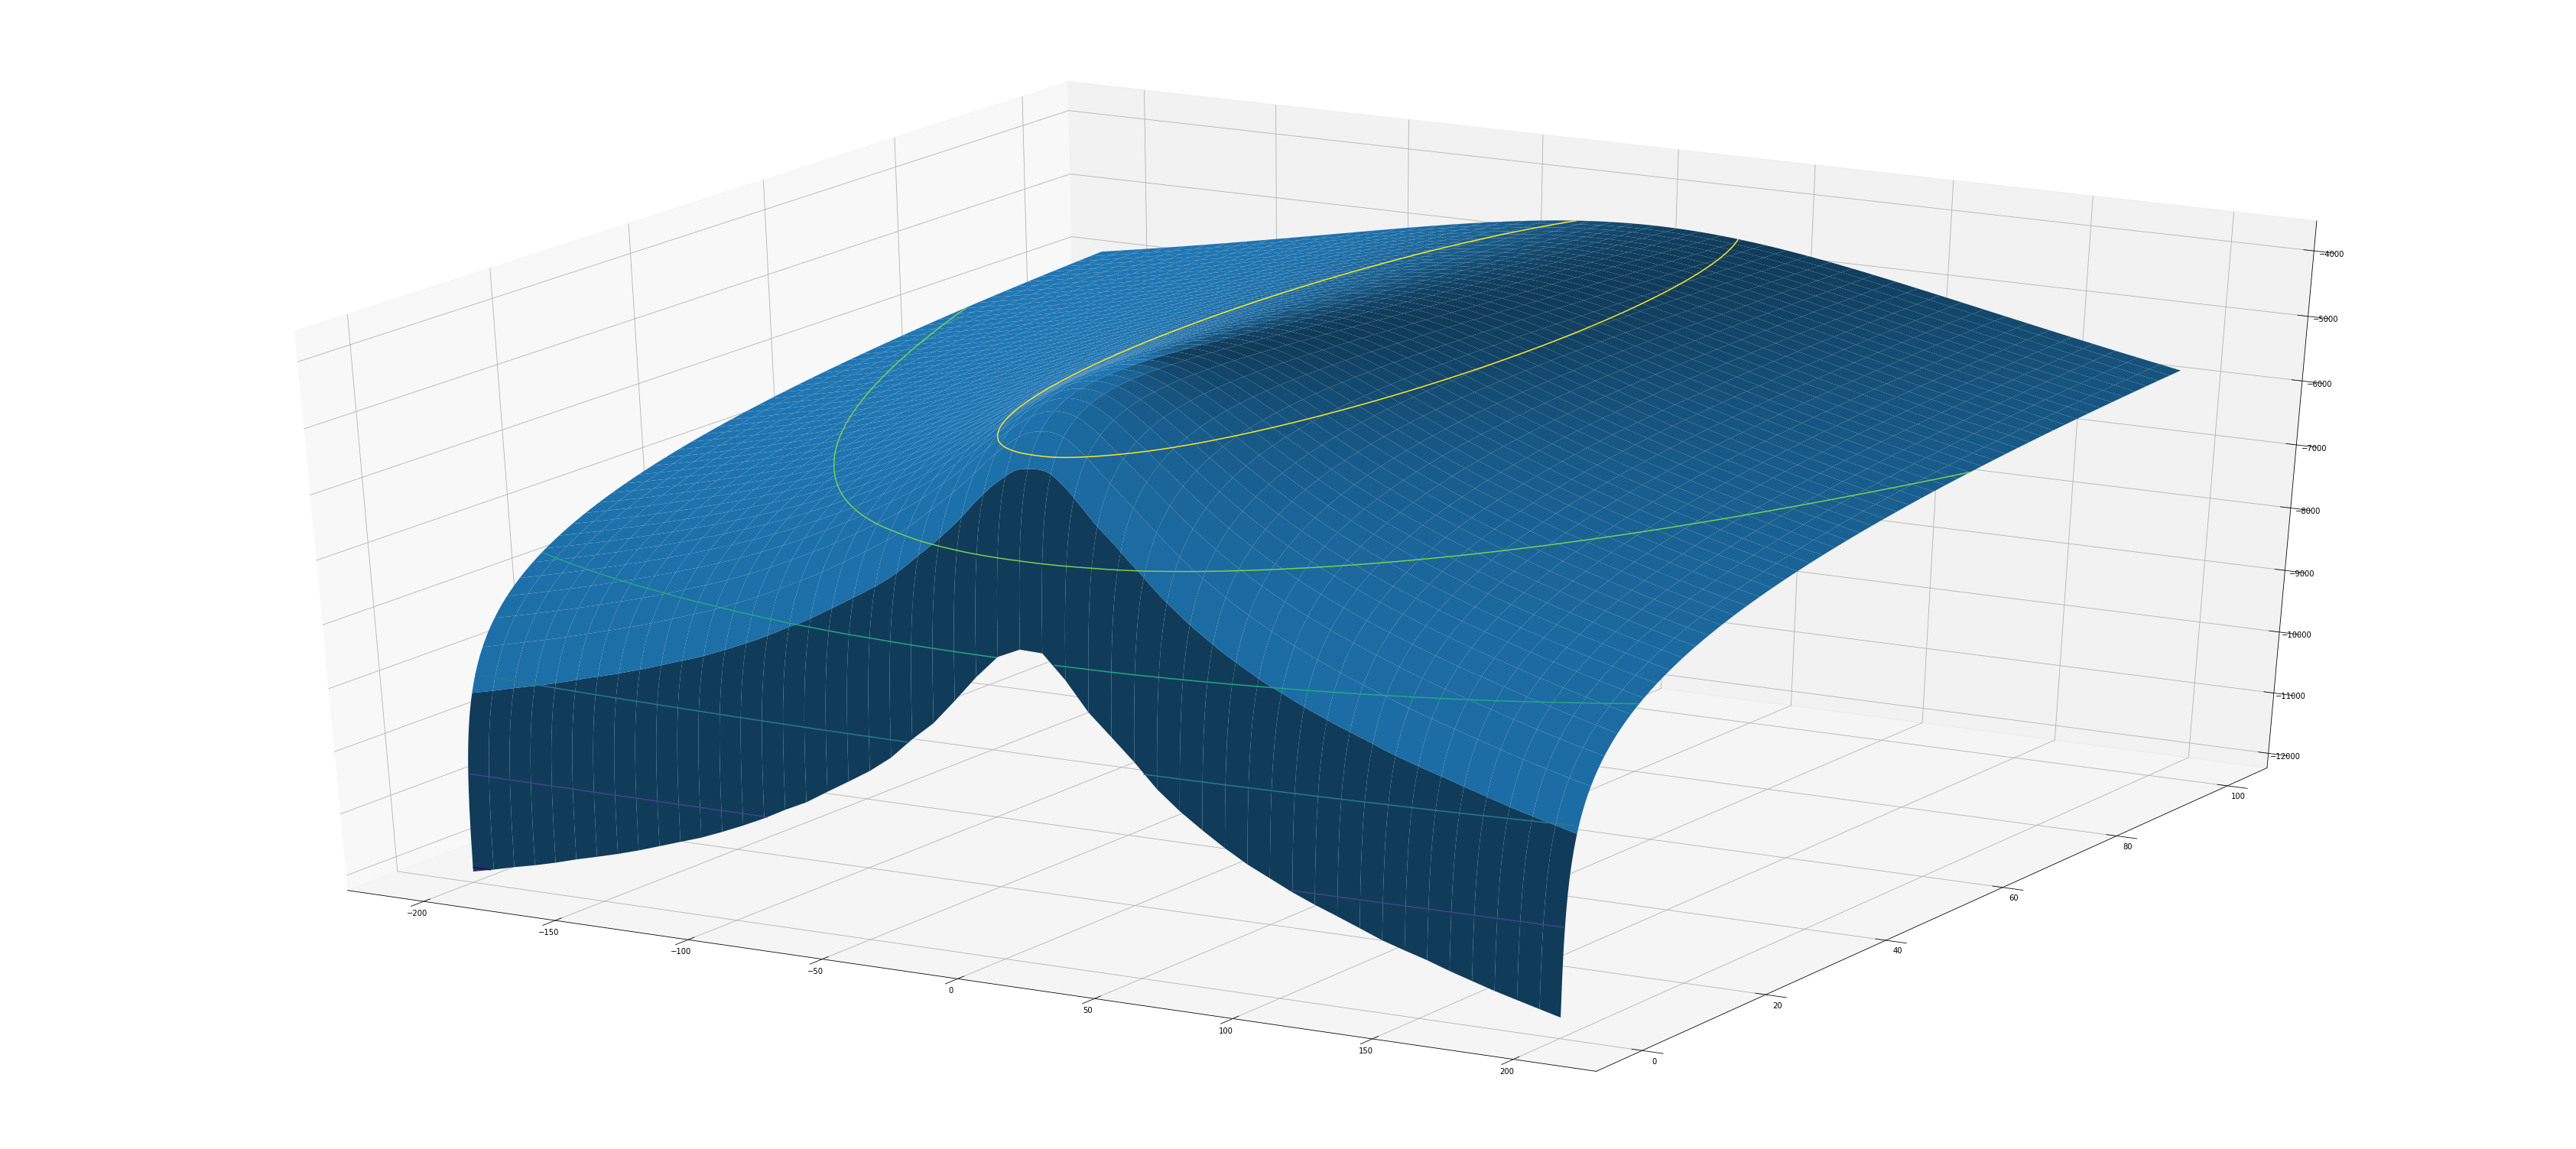

In [23]:
## Lets use log likelihoods
def calculate_likelihood(a,b,data):
    return numpy.sum(numpy.log( b / (numpy.square(b) + numpy.square(data - a))))

## Brute Force maximum...

amin = -200
amax = 200
av = 800

bmin = 0
bmax = 100
bv = 1000

ai = numpy.linspace(amin,amax,av)
bi = numpy.linspace(bmin,bmax,bv)
ab,ba = numpy.meshgrid(ai,bi)

likelihoods = numpy.array([calculate_likelihood(a,b,s) for a,b in zip(numpy.ravel(ab),numpy.ravel(ba))])
likelihoods = likelihoods.reshape(ab.shape)
        
print(likelihoods.max())
argmax = likelihoods.argmax()
plt.rcParams['figure.figsize'] = [60, 60]
fig=plt.figure()
ax1 = fig.add_subplot(211, projection='3d')
ax1.plot_surface(ab,ba,likelihoods)
ax1.contour(ab,ba,likelihoods)
plt.show()